# Import the Liabraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/sukhioo7/dataset/refs/heads/main/Diabetes%20Prediction.csv?raw=True")

In [19]:
data.head()

,Pregnant Rate,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Test Results
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


In [20]:
data.shape

(768, 9)

In [21]:
data.isnull().sum()

Pregnant Rate                       0
Plasma glucose concentration        0
Diastolic blood pressure (mm Hg)    0
Triceps skin fold thickness (mm)    0
2-Hour serum insulin (mu U/ml)      0
Body mass index                     0
Diabetes pedigree function          0
Age                                 0
Test Results                        0
dtype: int64

## Plotting Histplot Graph

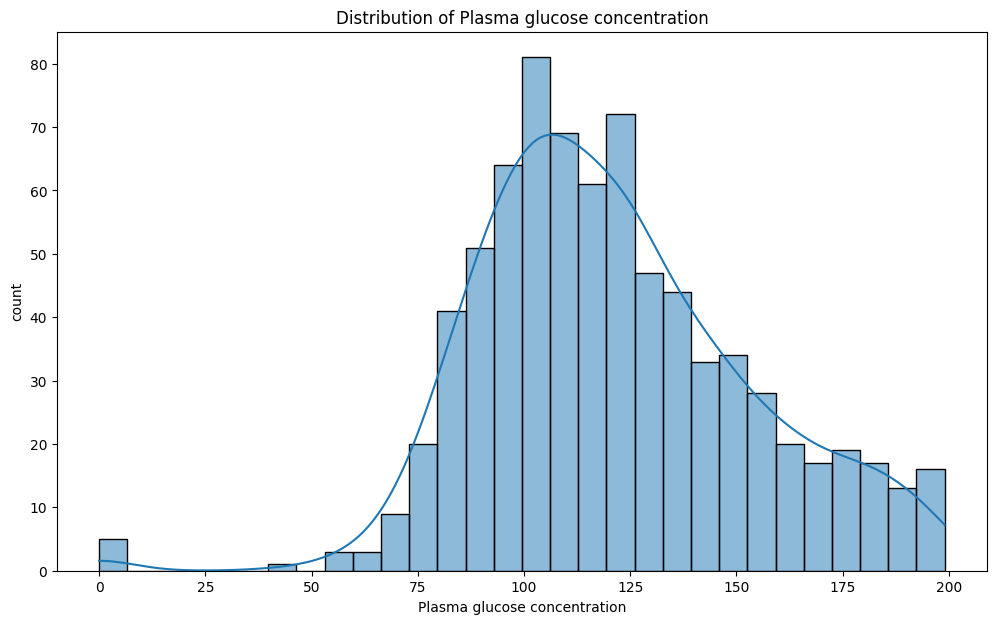

In [22]:
plt.figure(figsize=(12,7))
sns.histplot(data['Plasma glucose concentration'],bins=30,kde=True)
plt.xlabel('Plasma glucose concentration')
plt.ylabel('count')
plt.title('Distribution of Plasma glucose concentration')
plt.show()

## Plotting Boxplot

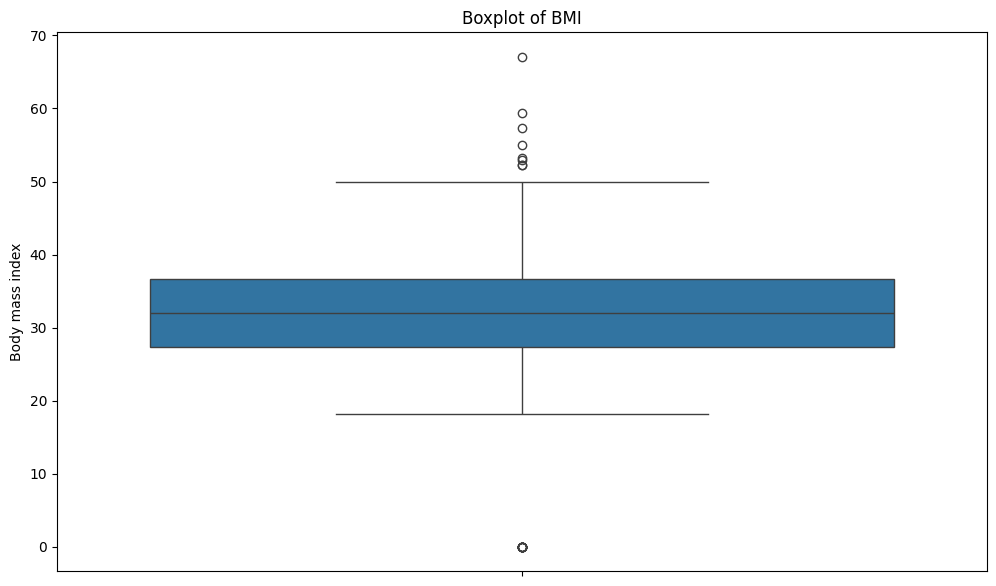

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(data['Body mass index'])
plt.title('Boxplot of BMI')
plt.show()

## Plotting Scatterplot

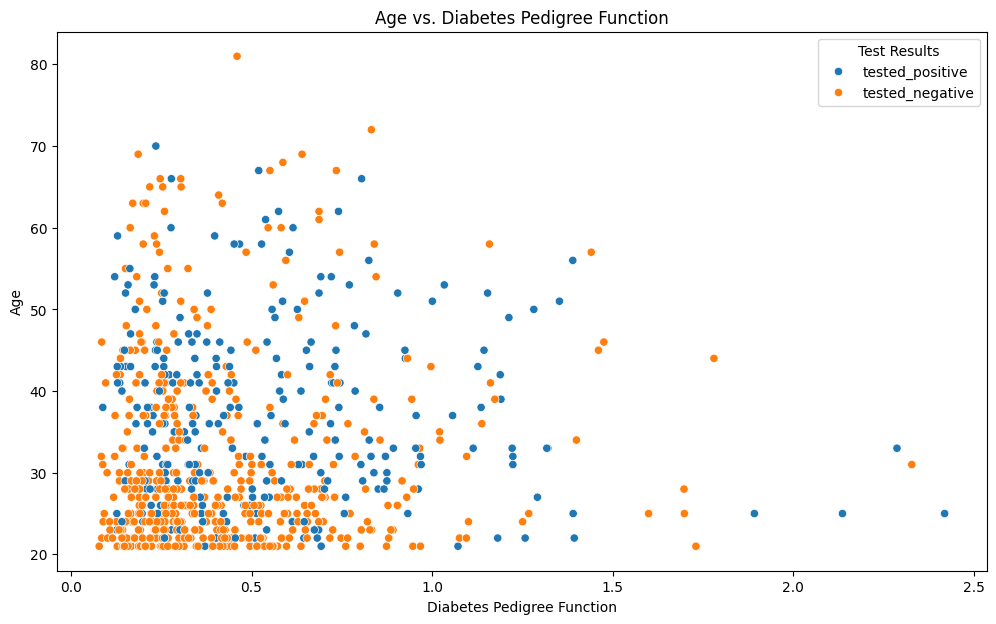

In [24]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=data['Diabetes pedigree function'], y=data['Age'], hue=data['Test Results'])
plt.title('Age vs. Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Age')
plt.show()

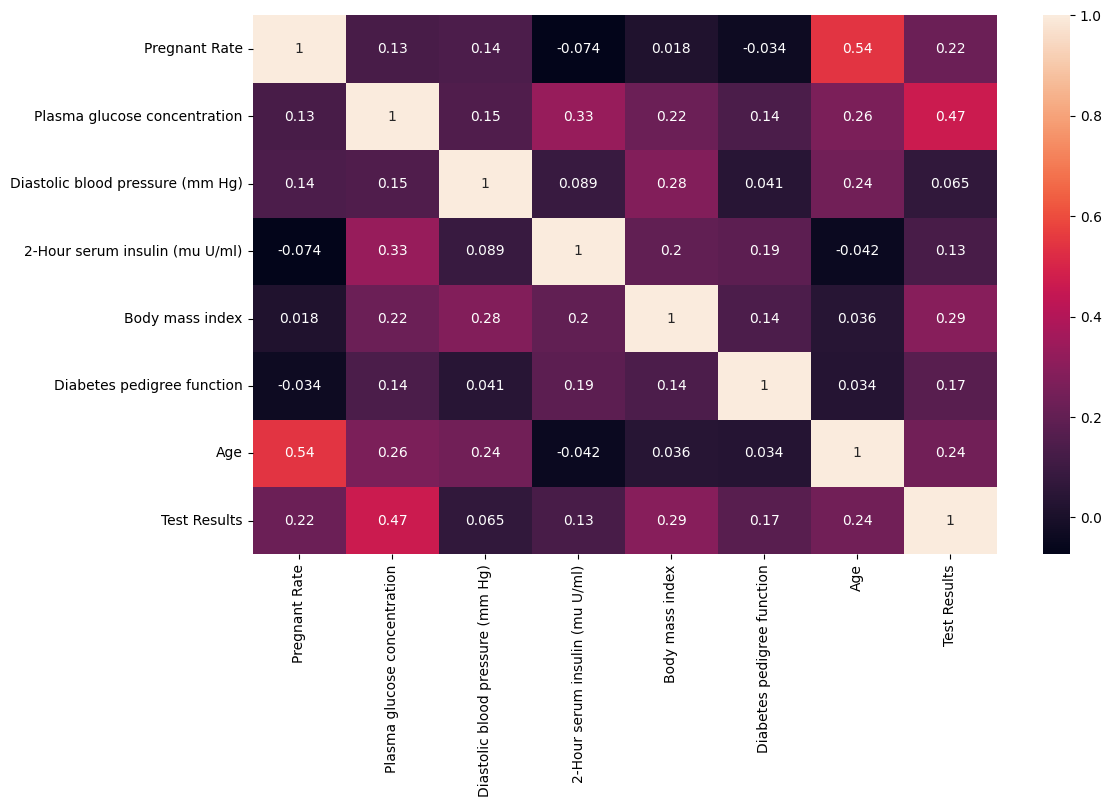

In [64]:
plt.figure(figsize=(12,7))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [25]:
data.drop(['Triceps skin fold thickness (mm)'], axis=1, inplace=True)

In [46]:
data['Test Results'] = data['Test Results'].map({'tested_positive': 1, 'tested_negative': 0})

In [47]:
# Separate features (X) and target (y)
X = data.drop(columns=['Age'])  # Features
Y = data['Test Results']  # Target variable)

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [50]:
logistic_regression.fit(X_train,Y_train)

C:\Users\RENU\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions = logistic_regression.predict(X_test)

<Axes: ylabel='count'>

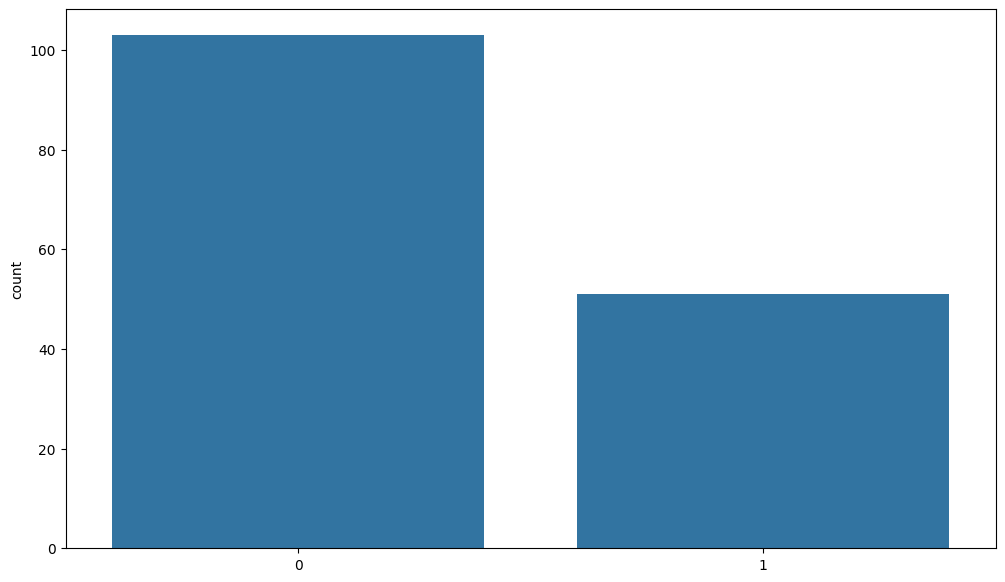

In [55]:
plt.figure(figsize=(12,7))
sns.countplot(x=predictions)

<Axes: xlabel='Test Results', ylabel='count'>

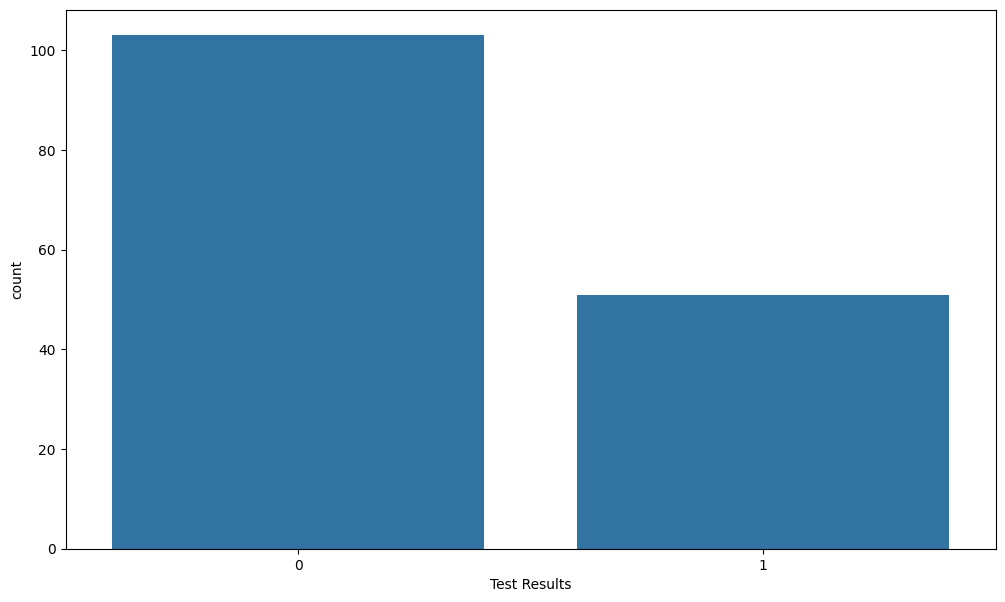

In [56]:
plt.figure(figsize=(12,7))
sns.countplot(x=Y_test)

In [57]:
X_test.iloc[0]

Pregnant Rate                         1.000
Plasma glucose concentration        126.000
Diastolic blood pressure (mm Hg)     60.000
2-Hour serum insulin (mu U/ml)        0.000
Body mass index                      30.100
Diabetes pedigree function            0.349
Test Results                          1.000
Name: 766, dtype: float64

In [58]:
logistic_regression.predict(X_test.iloc[[0]])

array([1])

In [59]:
logistic_regression.predict_proba(X_test.iloc[[0]])

array([[0.03653357, 0.96346643]])

<Axes: >

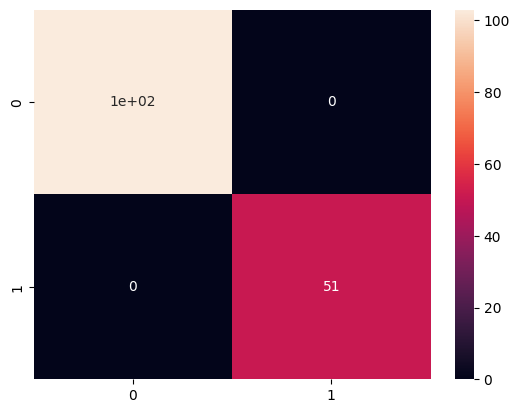

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(data=confusion_matrix(Y_test,predictions),annot=True)

In [63]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        51

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

